In [1]:
import sys,os
import xarray as xr
import numpy as np
import scipy as spy
import pickle 

import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from collections import OrderedDict 

import time as timestamp 
import importlib

In [2]:
sys.path.append("/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/")
import LIM_utils_kb as limkb
import LIM_stats_kb as statskb
import LIM_plot_kb as plotkb
import LIM_building as limbuild

sys.path.append("/home/disk/kalman2/mkb22/pyLMR/")
import LMR_utils

In [3]:
import importlib
importlib.reload(limkb)

<module 'LIM_utils_kb' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py'>

## Regrid data for cross-model validation: 

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import xesmf as xe
import os.path

In [5]:
fdic_cesm_lme = limkb.build_training_dic('cesm_lme')
fdic_cesm_le = limkb.build_training_dic('cesm_le')
fdic_mpi_lm = limkb.build_training_dic('mpi_lm_kb')
fdic_ccsm4_lm = limkb.build_training_dic('ccsm4_lm_kb')
fdic_mpi_hist = limkb.build_training_dic('cmip6_mpi_hist')
fdic_cesm2_hist = limkb.build_training_dic('cmip6_cesm2_hist')
fdic_gfdl_hist = limkb.build_training_dic('cmip6_gfdl_hist')
fdic_canESM_hist = limkb.build_training_dic('cmip6_CanESM_hist')
fdic_hadGEM3_hist = limkb.build_training_dic('cmip6_HadGEM3_hist')
fdic_sat = limkb.build_training_dic('satellite')
fdic_era5 = limkb.build_training_dic('era5')
limvars = ['tas','tos','psl','zg','sit','sic']

In [ ]:
#data_mpi_lm = xr.open_dataset(fdic_mpi_lm[var])

In [ ]:
# data_mpi_hist = xr.open_dataset(fdic_mpi_hist[var])
# data_cesm_le = xr.open_dataset(fdic_cesm_le[var])
# #data_sat = xr.open_dataset(fdic_sat[var])
# data_era5 = xr.open_dataset(fdic_era5[var])

In [ ]:
# data_grid_lme = xr.open_dataset(fdic_cesm_lme['tos'])
# data_grid_le = xr.open_dataset(fdic_cesm_le['tos'])

In [ ]:
#data_valid = data_valid.rename_dims(dims_dict = {'i':'nlon','j':'nlat'})

## CESM LE to CESM LME: 

In [ ]:
var = 'sic'
data_cesm_le = xr.open_dataset(fdic_cesm_le[var])
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])

In [ ]:
data_cesm_lme

In [ ]:
data_cesm_le

In [ ]:
data_cesm_le = data_cesm_le.drop('time_bound')
data_cesm_le = data_cesm_le.drop('z_t')
# data_cesm_le = data_cesm_le.drop('latt_bounds')

# data_cesm_lme = data_cesm_lme.drop('tarea')
# data_cesm_lme = data_cesm_lme.drop('tmask')

# data_cesm_le = data_cesm_le.assign_coords({'lat':data_cesm_le.lat,'lon':data_cesm_le.lon})
# data_cesm_lme = data_cesm_lme.assign_coords({'lat':data_cesm_lme.lat,'lon':data_cesm_lme.lon})

In [ ]:
regridder = xe.Regridder(data_cesm_le, data_cesm_lme, 'bilinear', reuse_weights=True)

In [ ]:
data_cesm_le_regrid = regridder(data_cesm_le)

In [ ]:
filename_cesm_le = {'sic':'sic_CESM_LE_002_nh_regrid_cesm_lme_200601-210012.nc',
                    'tos':'tos_CESM_LE_002_regrid_cesm_lme_200601_210012_2d.nc',
                    'tas':'tas_CESM_LE_002_regrid_cesm_lme_200601-210012.nc',
                    'zg':'zg_500hPa_CESM_LE_002_regrid_cesm_lme_200601-210012.nc',
                    'psl':'psl_CESM_LE_002_regrid_cesm_lme_200601-210012.nc',
                    'sit':'sit_CESM_LE_002_nh_regrid_cesm_lme_200601-210012.nc'}

In [ ]:
# fig = plt.figure(1, figsize=(16, 8))
# #axs = plt.axes(projection=ccrs.NorthPolarStereo())
# axs = plt.axes(projection=ccrs.Robinson())
# axs.coastlines()
# #axs.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
# # plt.pcolormesh(data_grid['lon'].values[-104:,:],data_grid['lat'].values[-104:,:],
# #                data_cesm_lme.sic.values[0,:,:], transform=ccrs.PlateCarree())
# data_cesm_le[var].isel(time=0).plot.pcolormesh('lon','lat',ax=axs,transform=ccrs.PlateCarree())
# plt.title('Original', fontsize=16)

In [ ]:
data_cesm_le[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_cesm_le_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
# print('Saving regridded file in: '+fdic_cesm_le['fpath']+filename_cesm_le[var])
# data_cesm_le_regrid.to_netcdf(fdic_cesm_le['fpath']+filename_cesm_le[var])

## CESM2 Historical to CESM LME: 

In [18]:
var = 'sic'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_cesm2_hist = xr.open_dataset(fdic_cesm2_hist[var])

/home/disk/chaos/mkb22/anaconda2/envs/lims_update/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'sic' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [19]:
data_cesm2_hist = data_cesm2_hist.drop('time_bnds')
data_cesm2_hist = data_cesm2_hist.drop('lat_bnds')
data_cesm2_hist = data_cesm2_hist.drop('lon_bnds')
data_cesm2_hist = data_cesm2_hist.drop('ni')
data_cesm2_hist = data_cesm2_hist.drop('nj')

In [25]:
regridder = xe.Regridder(data_cesm2_hist,data_cesm_lme, 'bilinear', reuse_weights=False, ignore_degenerate=True)

/home/disk/chaos/mkb22/anaconda2/envs/lims_update/lib/python3.6/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [26]:
data_cesm2_hist_regrid = regridder(data_cesm2_hist)

In [27]:
data_cesm2_hist_regrid

<xarray.Dataset>
Dimensions:  (nlat: 104, nlon: 320, time: 1980)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    lon      (nlat, nlon) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    lat      (nlat, nlon) float32 30.38 30.38 30.38 30.38 ... nan nan nan nan
Dimensions without coordinates: nlat, nlon
Data variables:
    sic      (time, nlat, nlon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

In [28]:
# data_cesm2_hist_regrid = data_cesm2_hist_regrid.drop('plev')
# data_cesm2_hist_regrid

In [29]:
data_cesm2_hist_regrid[var].isel(time=0,plev=0).plot.pcolormesh()

ValueError: dimensions {'plev'} do not exist. Expected one or more of ('time', 'nlat', 'nlon')

In [ ]:
data_cesm2_hist[var].isel(time=0,plev=0).plot.pcolormesh()

In [ ]:
filename_cesm2_hist = {'tas':'tas_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc',
                       'zg':'zg_500_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc',
                       'psl':'psl_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc'}

In [ ]:
# print('Saving regridded file in: '+fdic_cesm2_hist['fpath']+filename_cesm2_hist[var])
# data_cesm2_hist_regrid.to_netcdf(fdic_cesm2_hist['fpath']+filename_cesm2_hist[var])

## GFDL Historical to CESM LME

In [ ]:
var = 'zg'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_gfdl_hist = xr.open_dataset(fdic_gfdl_hist[var])

In [ ]:
data_gfdl_hist

In [ ]:
data_cesm_lme

In [ ]:
data_gfdl_hist = data_gfdl_hist.drop('lat_bnds')
data_gfdl_hist = data_gfdl_hist.drop('lon_bnds')
data_gfdl_hist = data_gfdl_hist.drop('time_bnds')
data_gfdl_hist = data_gfdl_hist.drop('plev')
#data_gfdl_hist = data_gfdl_hist.drop('GEOLON')
data_gfdl_hist

In [ ]:
regridder = xe.Regridder(data_gfdl_hist,data_cesm_lme, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_gfdl_regrid = regridder(data_gfdl_hist)

In [ ]:
data_gfdl_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_gfdl_hist[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_gfdl = {'sic':'sic_SImon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                 'tos':'tos_Omon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                 'tas':'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                 'zg':'zg_500hPa_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                 'psl':'psl_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                 'sit':'sit_SImon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_gfdl_hist['fpath']+filename_gfdl[var])
data_gfdl_regrid.to_netcdf(fdic_gfdl_hist['fpath']+filename_gfdl[var])

# MPI simulations have the coarsest grid
  
Regrid everything onto that grid for comparison.  
220 x 256

## CESM LME to MPI Historical (cmip6) grid: 

In [ ]:
filename_cesm_lme = {'sic':'sic_SImon_CESM_LME_nh_002_regrid_mpihist_085001-200512.nc',
                     'tos':'tos_sfc_Omon_CESM_LMEallforc_002_regrid_mpihist_085001-200512.nc',
                     'tas':'tas_sfc_Amon_CESM_LMEallforc_002_regrid_mpihist_085001-200512.nc',
                     'zg':'zg_500hPa_Amon_CESM_LMEallforc_002_regrid_mpihist_085001-200512.nc',
                     'psl':'psl_sfc_Amon_CESM_LMEallforc_002_regrid_mpihist_085001-200512.nc',
                     'sit':'sit_SImon_CESM_LME_nh_002_regrid_mpihist_085001-200512.nc'}

In [ ]:
var = 'zg'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_mpi_hist = xr.open_dataset(fdic_mpi_hist[var])

In [ ]:
regridder = xe.Regridder(data_cesm_lme, data_mpi_hist, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_mpi_hist

In [ ]:
data_cesm_lme = data_cesm_lme.drop('time_bnds')
data_cesm_lme

# data_mpi_hist = data_mpi_hist.drop('time_bnds')
# data_mpi_hist = data_mpi_hist.drop('vertices_latitude')
# data_mpi_hist = data_mpi_hist.drop('vertices_longitude')

In [ ]:
data_cesm_lme_regrid = regridder(data_cesm_lme)

In [ ]:
data_cesm_lme_regrid 

In [ ]:
data_cesm_lme_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_cesm_lme[var].isel(time=0).plot.pcolormesh()

In [ ]:
print('Saving regridded file in: '+fdic_cesm_lme['fpath']+filename_cesm_lme[var])
data_cesm_lme_regrid.to_netcdf(fdic_cesm_lme['fpath']+filename_cesm_lme[var])

## CESM LME to all Atmospheric grid: 

In [ ]:
var = 'sit'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_cesm_lme_ocean = xr.open_dataset(fdic_cesm_lme[var])

In [ ]:
regridder = xe.Regridder(data_cesm_lme_ocean, data_cesm_lme_atmos, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_cesm_lme_ocean = data_cesm_lme_ocean.drop('latt_bounds')
data_cesm_lme_ocean = data_cesm_lme_ocean.drop('lont_bounds')
data_cesm_lme_ocean = data_cesm_lme_ocean.drop('time_bounds')
# data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tarea')
# data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
data_cesm_lme_ocean = data_cesm_lme_ocean.assign_coords({'lon':data_cesm_lme_ocean.lon,
                                                         'lat':data_cesm_lme_ocean.lat})

data_cesm_lme_ocean

In [ ]:
data_cesm_lme_regrid = regridder(data_cesm_lme_ocean)

In [ ]:
data_cesm_lme_regrid[var].isel(time=0).plot.pcolormesh(vmax=50)

In [ ]:
data_cesm_lme_ocean[var].isel(time=0).plot.pcolormesh(vmax=50)

In [ ]:
data_cesm_lme_regrid

In [ ]:
filename_cesm_lme = {'sic':'sic_SImon_CESM_LME_nh_002_regrid_Amon_085001-200512.nc',
                     'tos':'tos_sfc_Omon_CESM_LMEallforc_002_regrid_Amon_085001-200512.nc',
                     'sit':'sit_SImon_CESM_LME_nh_002_regrid_Amon_085001-200512.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_cesm_lme['fpath']+filename_cesm_lme[var])
data_cesm_lme_regrid.to_netcdf(fdic_cesm_lme['fpath']+filename_cesm_lme[var])

## CESM2 Historical to all Atmospheric grid: 

In [43]:
var = 'sic'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_cesm2_hist_ocean = xr.open_dataset(fdic_cesm2_hist[var])

/home/disk/chaos/mkb22/anaconda2/envs/lims_update/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'sic' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [44]:
regridder = xe.Regridder(data_cesm2_hist_ocean, data_cesm_lme_atmos, 'bilinear',
                         periodic=True,reuse_weights=False,ignore_degenerate=True)

/home/disk/chaos/mkb22/anaconda2/envs/lims_update/lib/python3.6/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [53]:
# data_cesm2_hist_ocean = data_cesm2_hist_ocean.drop('lat_bnds')
# data_cesm2_hist_ocean = data_cesm2_hist_ocean.drop('lon_bnds')
# data_cesm2_hist_ocean = data_cesm2_hist_ocean.drop('time_bnds')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tarea')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
# data_cesm2_hist_ocean = data_cesm2_hist_ocean.assign_coords({'nlon':data_cesm2_hist_ocean.ni,
#                                                              'nlat':data_cesm2_hist_ocean.nj})
data_cesm2_hist_ocean = data_cesm2_hist_ocean.drop('ni')
data_cesm2_hist_ocean = data_cesm2_hist_ocean.drop('nj')

data_cesm2_hist_ocean

<xarray.Dataset>
Dimensions:  (nlat,: 384, nlon,: 320, time: 1980)
Coordinates:
    lat      (nlat,, nlon,) float64 -79.22 -79.22 -79.22 ... 9.969e+36 9.969e+36
    lon      (nlat,, nlon,) float64 320.6 321.7 322.8 ... 9.969e+36 9.969e+36
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    nlon     (nlon,) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    nlat     (nlat,) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
Dimensions without coordinates: nlat,, nlon,
Data variables:
    sic      (time, nlat,, nlon,) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-17T00:39:18Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    grid:                   native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  seaIce
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    table_id:               SImon
    tracking_id:            hdl:21.14100/0cf7c082-6ec3-410e-9840-f4d0e7aa6da6
    variable_id:            siconc
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [54]:
data_cesm2_hist_regrid = regridder(data_cesm2_hist_ocean)

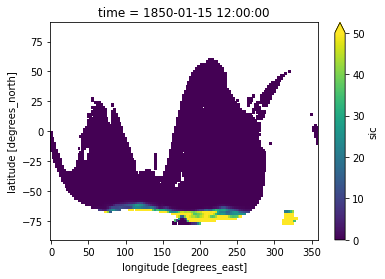

In [57]:
data_cesm2_hist_regrid[var].isel(time=0).plot.pcolormesh(vmax=50)

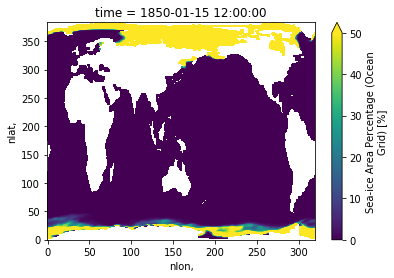

In [58]:
data_cesm2_hist_ocean[var].isel(time=0).plot.pcolormesh(vmax=50)

In [ ]:
filename_cesm2_hist = {'sic':'sic_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc',
                       'tos':'tos_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc',
                       'sit':'sit_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_cesm2_hist['fpath']+filename_cesm2_hist[var])
data_cesm2_hist_regrid.to_netcdf(fdic_cesm2_hist['fpath']+filename_cesm2_hist[var])

## MPI Historical to all Atmospheric grid: 

In [ ]:
var = 'sic'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_mpi_hist_ocean = xr.open_dataset(fdic_mpi_hist[var])

In [ ]:
regridder = xe.Regridder(data_mpi_hist_ocean, data_cesm_lme_atmos, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_mpi_hist_ocean = data_mpi_hist_ocean.drop('vertices_latitude')
data_mpi_hist_ocean = data_mpi_hist_ocean.drop('vertices_longitude')
data_mpi_hist_ocean = data_mpi_hist_ocean.drop('time_bnds')
# data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tarea')
# data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
data_mpi_hist_ocean = data_mpi_hist_ocean.assign_coords({'lon':data_mpi_hist_ocean.lon,
                                                         'lat':data_mpi_hist_ocean.lat})

data_mpi_hist_ocean

In [ ]:
data_mpi_hist_regrid = regridder(data_mpi_hist_ocean)

In [ ]:
data_mpi_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_mpi_hist_ocean[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_mpi_hist = {'sic':'sic_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'tos':'tos_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'sit':'sit_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_mpi_hist['fpath']+filename_mpi_hist[var])
data_mpi_hist_regrid.to_netcdf(fdic_mpi_hist['fpath']+filename_mpi_hist[var])

## HadGEM3 Historical to all Atmospheric grid: 

In [ ]:
var = 'sic'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_hadGEM3_hist_ocean = xr.open_dataset(fdic_hadGEM3_hist[var])

In [ ]:
regridder = xe.Regridder(data_hadGEM3_hist_ocean, data_cesm_lme_atmos, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_hadGEM3_hist_ocean = data_hadGEM3_hist_ocean.drop('vertices_latitude')
data_hadGEM3_hist_ocean = data_hadGEM3_hist_ocean.drop('vertices_longitude')
data_hadGEM3_hist_ocean = data_hadGEM3_hist_ocean.drop('time_bnds')
# data_hadGEM3_ocean = data_cesm_lme_ocean.drop('tarea')
# data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
data_hadGEM3_hist_ocean = data_hadGEM3_hist_ocean.assign_coords({'lon':data_mpi_hist_ocean.lon,
                                                         'lat':data_mpi_hist_ocean.lat})

data_hadGEM3_hist_ocean

In [ ]:
data_hadGEM3_hist_regrid = regridder(data_hadGEM3_hist_ocean)

In [ ]:
data_hadGEM3_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_hadGEM3_hist_ocean[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_hadGEM3_hist = {'sic':'sic_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                         'tos':'tos_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                         'sit':'sit_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_hadGEM3_hist['fpath']+filename_hadGEM3_hist[var])
data_hadGEM3_hist_regrid.to_netcdf(fdic_hadGEM3_hist['fpath']+filename_hadGEM3_hist[var])

## GFDL Historical to all Atmospheric grid: 

In [ ]:
var = 'sit'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_gfdl_hist_ocean = xr.open_dataset(fdic_gfdl_hist[var])

In [ ]:
regridder = xe.Regridder(data_gfdl_hist_ocean, data_cesm_lme_atmos, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('lat_bnds')
data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('lon_bnds')
data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('time_bnds')
#data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('GEOLAT')
data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('GEOLON')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tarea')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
# data_gfdl_hist_ocean = data_gfdl_hist_ocean.assign_coords({'lon':data_gfdl_hist_ocean.lon,
#                                                            'lat':data_gfdl_hist_ocean.lat})

data_gfdl_hist_ocean

In [ ]:
data_gfdl_hist_regrid = regridder(data_gfdl_hist_ocean)

In [ ]:
data_gfdl_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_gfdl_hist_ocean[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_gfdl_hist = {'sic':'sic_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                      'tos':'tos_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc',
                      'sit':'sit_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_gfdl_hist['fpath']+filename_gfdl_hist[var])
data_gfdl_hist_regrid.to_netcdf(fdic_gfdl_hist['fpath']+filename_gfdl_hist[var])

## CanESM Historical to all Atmospheric grid: 

In [ ]:
var = 'sic'
data_cesm_lme_atmos = xr.open_dataset(fdic_cesm_lme['tas'])
data_canESM_hist_ocean = xr.open_dataset(fdic_canESM_hist[var])

In [ ]:
regridder = xe.Regridder(data_canESM_hist_ocean, data_cesm_lme_atmos, 'bilinear', periodic=True,reuse_weights=False)

In [ ]:
data_canESM_hist_ocean = data_canESM_hist_ocean.drop('vertices_latitude')
data_canESM_hist_ocean = data_canESM_hist_ocean.drop('vertices_longitude')
data_canESM_hist_ocean = data_canESM_hist_ocean.drop('time_bnds')
# #data_gfdl_hist_ocean = data_gfdl_hist_ocean.drop('GEOLAT')
# data_canESM_hist_ocean = data_canESM_hist_ocean.drop('GEOLON')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tarea')
# # data_cesm_lme_ocean = data_cesm_lme_ocean.drop('tmask')
data_canESM_hist_ocean = data_canESM_hist_ocean.assign_coords({'lon':data_canESM_hist_ocean.lon,
                                                               'lat':data_canESM_hist_ocean.lat})

data_canESM_hist_ocean

In [ ]:
data_canESM_hist_regrid = regridder(data_canESM_hist_ocean)

In [ ]:
data_canESM_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_canESM_hist_ocean[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_canESM_hist = {'sic':'sic_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                        'tos':'tos_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                        'sit':'sit_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_canESM_hist['fpath']+filename_canESM_hist[var])
data_canESM_hist_regrid.to_netcdf(fdic_canESM_hist['fpath']+filename_canESM_hist[var])

## MPI Historical grid to CESM LME: 

In [ ]:
var = 'zg'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_mpi_hist = xr.open_dataset(fdic_mpi_hist[var])

In [ ]:
# data_mpi_hist = data_mpi_hist.drop('time_bnds')
# data_mpi_hist = data_mpi_hist.drop('vertices_latitude')
# data_mpi_hist = data_mpi_hist.drop('vertices_longitude')
data_mpi_hist = data_mpi_hist.drop('lat_bnds')
data_mpi_hist = data_mpi_hist.drop('lon_bnds')
data_mpi_hist

In [ ]:
regridder = xe.Regridder(data_mpi_hist, data_cesm_lme, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_mpi_hist_regrid = regridder(data_mpi_hist)

In [ ]:
data_mpi_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_mpi_hist[var].isel(time=0).plot.pcolormesh(vmax=3.5)

In [ ]:
filename_mpi_hist = {'sic':'sic_SImon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'tos':'tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'tas':'tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'zg':'zg_500hPa_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'psl':'psl_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc',
                     'sit':'sit_SImon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_mpi_lm['fpath']+filename_mpi_lm[var])
data_mpi_hist_regrid.to_netcdf(fdic_mpi_lm['fpath']+filename_mpi_lm[var])

## CanESM to CESM LME grid: 

In [ ]:
var = 'sit'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_canESM_hist = xr.open_dataset(fdic_canESM_hist[var])

In [ ]:
data_canESM_hist = data_canESM_hist.drop('time_bnds')
data_canESM_hist = data_canESM_hist.drop('vertices_latitude')
data_canESM_hist = data_canESM_hist.drop('vertices_longitude')
# data_canESM_hist = data_canESM_hist.drop('type')
data_canESM_hist

In [ ]:
regridder = xe.Regridder(data_canESM_hist, data_cesm_lme, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_canESM_hist_regrid = regridder(data_canESM_hist)

In [ ]:
data_canESM_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_canESM_hist[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_canESM_hist = {'sic':'sic_SImon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                         'tos':'tos_Omon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                         'tas':'tas_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                         'zg':'zg500hPa_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                         'psl':'psl_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc',
                         'sit':'sit_SImon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_canESM_hist['fpath']+filename_canESM_hist[var])
data_canESM_hist_regrid.to_netcdf(fdic_canESM_hist['fpath']+filename_canESM_hist[var])

## HadGEM3 to CESM LME grid: 

In [ ]:
var = 'sit'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_hadGEM3_hist = xr.open_dataset(fdic_hadGEM3_hist[var])

In [ ]:
data_hadGEM3_hist = data_hadGEM3_hist.drop('time_bnds')
data_hadGEM3_hist = data_hadGEM3_hist.drop('vertices_latitude')
data_hadGEM3_hist = data_hadGEM3_hist.drop('vertices_longitude')
#data_hadGEM3_hist = data_hadGEM3_hist.drop('type')
data_hadGEM3_hist

In [ ]:
regridder = xe.Regridder(data_hadGEM3_hist, data_cesm_lme, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_hadGEM3_hist_regrid = regridder(data_hadGEM3_hist)

In [ ]:
data_hadGEM3_hist_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_hadGEM3_hist[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_hadGEM3_hist = {'sic':'sic_SImon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                     'tos':'tos_Omon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                     'tas':'tas_sfc_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                     'zg':'zg500hPa_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                     'psl':'psl_sfc_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc',
                     'sit':'sit_SImon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_hadGEM3_hist['fpath']+filename_hadGEM3_hist[var])
data_hadGEM3_hist_regrid.to_netcdf(fdic_hadGEM3_hist['fpath']+filename_hadGEM3_hist[var])

## CCSM4 Last Millenium grid to CESM LME: 

In [ ]:
var = 'sic'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_ccsm4_lm = xr.open_dataset(fdic_ccsm4_lm[var])

In [ ]:
data_ccsm4_lm = data_ccsm4_lm.drop('time_bnds')
data_ccsm4_lm = data_ccsm4_lm.drop('lat_vertices')
data_ccsm4_lm = data_ccsm4_lm.drop('lon_vertices')
# data_ccsm4_lm = data_ccsm4_lm.isel(plev=0)
data_ccsm4_lm

In [ ]:
regridder = xe.Regridder(data_ccsm4_lm, data_cesm_lme, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_ccsm4_lm_regrid = regridder(data_ccsm4_lm)

In [ ]:
data_ccsm4_lm_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_ccsm4_lm[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_ccsm4_lm = {'sic':'sic_sfc_OImon_CCSM4_past1000_regridlme_085001-185012.nc',
                       'tos':'tos_sfc_Omon_CCSM4_past1000_regridlme_085001-185012.nc',
                       'tas':'tas_sfc_Amon_CCSM4_past1000_regridlme_085001-185012.nc',
                       'zg':'zg_500hPa_Amon_CCSM4_past1000_regridlme_085001-185012.nc',
                       'psl':'psl_sfc_Amon_CCSM4_past1000_regridlme_085001-185012.nc',
                       'sit':'sit_sfc_OImon_CCSM4_past1000_regridlme_085001-185012.nc'}

ccsm4_lm_dir = '/home/disk/kalman2/mkb22/LMR/data/model/ccsm4_last_millenium/'

In [ ]:
print('Saving regridded file in: '+ccsm4_lm_dir+filename_ccsm4_lm[var])
data_ccsm4_lm_regrid.to_netcdf(ccsm4_lm_dir+filename_ccsm4_lm[var])

## MPI Last Millenium grid to CESM LME: 

In [ ]:
var = 'sit'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_mpi_lm = xr.open_dataset(fdic_mpi_lm[var])

In [ ]:
data_mpi_lm = data_mpi_lm.drop('time_bnds')
data_mpi_lm = data_mpi_lm.drop('lat_vertices')
data_mpi_lm = data_mpi_lm.drop('lon_vertices')

#data_mpi_lm = data_mpi_lm.isel(plev=0)
data_mpi_lm

In [ ]:
regridder = xe.Regridder(data_mpi_lm, data_cesm_lme, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_mpi_lm_regrid = regridder(data_mpi_lm)

In [ ]:
data_mpi_lm_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_mpi_lm[var].isel(time=0).plot.pcolormesh()

In [ ]:
filename_mpi_lm = {'sic':'sic_sfc_OImon_MPI-ESM-P_past1000_regridlme_085001-185012.nc',
                   'tos':'tos_sfc_Omon_MPI-ESM-P_past1000_regridlme_085001-184912.nc',
                   'tas':'tas_sfc_Amon_MPI-ESM-P_past1000_regridlme_085001-184912.nc',
                   'zg':'zg_500hPa_Amon_MPI-ESM-P_past1000_regridlme_085001-184912.nc',
                   'psl':'psl_sfc_Amon_MPI-ESM-P_past1000_regridlme_085001-184912.nc',
                   'sit':'sit_sfc_OImon_MPI-ESM-P_past1000_regridlme_085001-185012.nc'}

mpi_lm_dir = '/home/disk/kalman2/mkb22/LMR/data/model/mpi-esm-p_last_millenium/'

In [ ]:
print('Saving regridded file in: '+mpi_lm_dir+filename_mpi_lm[var])
data_mpi_lm_regrid.to_netcdf(mpi_lm_dir+filename_mpi_lm[var])

## CESM LME to MPI LM grid: 

In [ ]:
var = 'sic'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_mpi_lm = xr.open_dataset(fdic_mpi_lm[var])

In [ ]:
# data_cesm_lme = data_cesm_lme.drop_vars('time_bounds')
# data_cesm_lme = data_cesm_lme.drop_vars('latt_bounds')
# data_cesm_lme = data_cesm_lme.drop_vars('lont_bounds')
#data_cesm_lme = data_cesm_lme.drop_vars('tarea')
data_cesm_lme = data_cesm_lme.drop_vars('tmask')
data_cesm_lme

In [ ]:
regridder = xe.Regridder(data_cesm_lme, data_mpi_lm, 'bilinear', reuse_weights=False, periodic=True)

In [ ]:
data_cesm_lme_regrid = regridder(data_cesm_lme)

In [ ]:
data_cesm_lme[var].isel(time=0).plot.pcolormesh()

In [ ]:
data_cesm_lme_regrid[var].isel(time=0).plot.pcolormesh()

In [ ]:
fig = plt.figure(1, figsize=(16, 8))
#axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()
#axs.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
data_cesm_lme_regrid[var].isel(time=0).plot.pcolormesh('lon','lat',ax=axs,transform=ccrs.PlateCarree())
plt.title('Regrid', fontsize=16)
# plt.scatter(data_cesm_lme_regrid.lon.values[30,100],data_cesm_lme_regrid.lat.values[40,150],
#             color='r',transform=ccrs.PlateCarree())

In [ ]:
filename_cesm_lme = {'sic':'sic_SImon_CESM_LME_nh_002_regrid_mpilm_085001-200512.nc',
                     'tos':'tos_sfc_Omon_CESM_LMEallforc_002_regrid_mpilm_085001-200512.nc',
                     'tas':'tas_sfc_Amon_CESM_LMEallforc_002_regrid_mpilm_085001-200512.nc',
                     'zg':'zg_500hPa_Amon_CESM_LMEallforc_002_regrid_mpilm_085001-200512.nc',
                     'psl':'psl_sfc_Amon_CESM_LMEallforc_002_regrid_mpilm_085001-200512.nc',
                     'sit':'sit_SImon_CESM_LME_nh_002_regrid_mpilm_085001-200512.nc'}


In [ ]:
print('Saving regridded file in: '+fdic_cesm_lme['fpath']+filename_cesm_lme[var])
data_cesm_lme_regrid.to_netcdf(fdic_cesm_lme['fpath']+filename_cesm_lme[var])

## ERA5 to MPI LM grid: 

In [ ]:
var = 'sic'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_era5 = xr.open_dataset(fdic_era5[var])

In [ ]:
regridder = xe.Regridder(data_era5, data_cesm_lme, 'bilinear', reuse_weights=True)

In [ ]:
data_era5_regrid = regridder(data_era5)

In [ ]:
data_era5_regrid

In [ ]:
fig = plt.figure(1, figsize=(16, 8))
#axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()
#axs.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
data_era5[var].isel(time=0).plot.pcolormesh('lon','lat',ax=axs,transform=ccrs.PlateCarree(),vmin=220)
plt.title('Original', fontsize=16)

In [ ]:
# fig = plt.figure(1, figsize=(16, 8))
# #axs = plt.axes(projection=ccrs.NorthPolarStereo())
# axs = plt.axes(projection=ccrs.Robinson())
# axs.coastlines()
# #axs.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())
# data_era5_regrid[var].isel(time=0).plot.pcolormesh('lon','lat',ax=axs,transform=ccrs.PlateCarree(),vmin=220)
# plt.title('Regridded', fontsize=16)

In [ ]:
data_era5_regrid.sic.isel(time=0).plot.pcolormesh()

In [ ]:
filename_era5 = {'sic':'sic_monthly_ERA5_1979_2020_regridlme.nc',
                 'tos':'tos_monthly_ERA5_1979_2020_regridlme.nc',
                 'tas':'tas_monthly_ERA5_1979_2020_regridlme.nc',
                 'psl':'psl_monthly_ERA5_1979_2020_regridlme.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_era5['fpath']+filename_era5[var])
data_era5_regrid.to_netcdf(fdic_era5['fpath']+filename_era5[var])

## Satellite to MPI LM grid: 

In [ ]:
var = 'sic'
data_cesm_lme = xr.open_dataset(fdic_cesm_lme[var])
data_sat = xr.open_dataset(fdic_sat[var])

In [ ]:
data_cesm_lme

In [ ]:
data_sat

In [ ]:
data_sat = data_sat.assign_coords({'j':data_sat.ygrid,'i':data_sat.xgrid})
data_sat = data_sat.drop_vars('projection')

In [ ]:
regridder = xe.Regridder(data_sat, data_cesm_lme, 'bilinear', reuse_weights=False)

In [ ]:
data_sat_regrid = regridder(data_sat)

In [ ]:
data_sat_regrid.sic.isel(time=0).plot.pcolormesh()

In [ ]:
data_sat.sic.isel(time=0).plot.pcolormesh()

In [ ]:
filename_sat = {'sic':'sic_goddard_merged_mon_v03r01_regridlme_1979_2016.nc'}

In [ ]:
print('Saving regridded file in: '+fdic_sat['fpath']+filename_sat[var])
data_sat_regrid.to_netcdf(fdic_sat['fpath']+filename_sat[var])

In [ ]:
fdic_sat[var]